In [13]:
import h5py
import itertools
from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import vedo

from histalign.backend.ccf.paths import get_atlas_path
from histalign.backend.io import load_image, load_volume
from histalign.backend.maths import compute_normal, compute_origin
from histalign.backend.models import (
    Orientation,
    Resolution,
    VolumeSettings,
)
from histalign.backend.preprocessing import normalise_array
from histalign.backend.workspace import VolumeSlicer

vedo.settings.default_backend = "vtk"

In [14]:
def imshow(image: np.ndarray) -> None:
    _ = plt.figure()

    plt.imshow(image)
    plt.axis(False)

    plt.show()


def show(
    meshes: vedo.CommonVisual | list[vedo.CommonVisual], camera: dict | None = None
) -> None:
    plotter = vedo.Plotter(axes=4)

    if not isinstance(meshes, list):
        meshes = [meshes]

    for mesh in meshes:
        plotter += mesh

    plotter.show(interactive=False, camera=camera).interactive().close()

In [15]:
volume = h5py.File(
    "/home/ediun/.local/share/histalign/interpolated_volumes/6de982e941173398c2531633b21a32b8_multiquadric_27_1_0_0.h5"
)["array"][:]

atlas = load_volume(get_atlas_path(Resolution.MICRONS_100), return_raw_array=True)

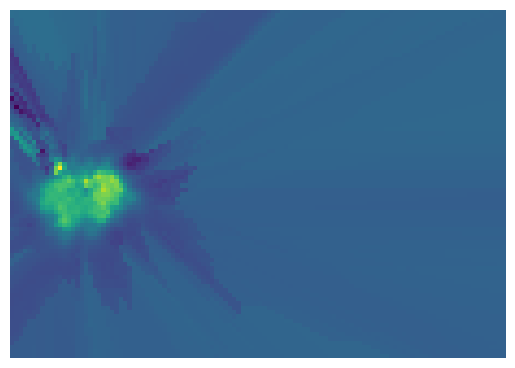

In [16]:
imshow(volume[65])

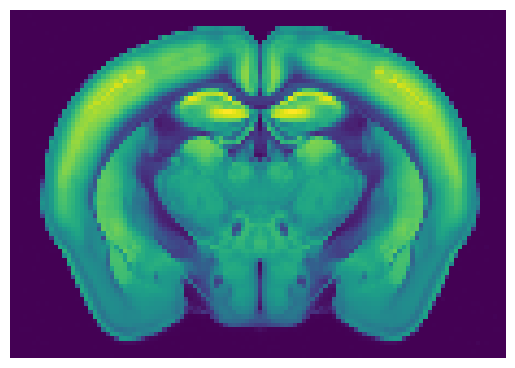

In [17]:
imshow(atlas[65])

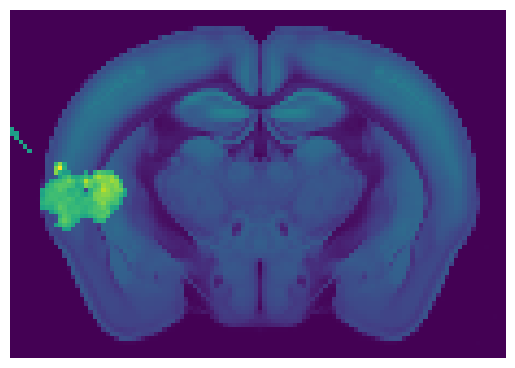

In [20]:
imshow(
    np.where(
        normalise_array(volume, np.uint16)[(atlas.shape[0] - 1) // 2] > 36000,
        normalise_array(volume, np.uint16)[(atlas.shape[0] - 1) // 2],
        atlas[(atlas.shape[0] - 1) // 2] * 100,
    )
)